In [7]:
import pandas as pd
import numpy as np

In [8]:
ratings = pd.read_csv('datasets/movielens_original/ratings.csv')
movies = pd.read_csv('datasets/movielens_original/movies.csv')

In [9]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [10]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [11]:
ratings = ratings[['movieId', 'rating']]
ratings

,movieId,rating
0,296,5.0
1,306,3.5
2,307,5.0
3,665,5.0
4,899,3.5
...,...,...
25000090,50872,4.5
25000091,55768,2.5
25000092,56176,2.0
25000093,58559,4.0


In [12]:
movies = movies[['movieId', 'title']]
movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
62418,209157,We (2018)
62419,209159,Window of the Soul (2001)
62420,209163,Bad Poems (2018)
62421,209169,A Girl Thing (2001)


In [13]:
# # num of movies with less than 50 reviews
# (ratings.groupby('movieId').rating.count() < 50).sum()

# # num of users that wrote less than 50 reviews
# (ratings.groupby('userId').rating.count() < 50).sum()

# # drop those unpopular movies and users to reduce sparsity
# popular_id = ratings.groupby('movieId').rating.count() >= 50
# popular_movie_ids = popular_id[popular_id].index
# ratings = ratings[ratings['movieId'].isin(popular_movie_ids)]
# movies = movies[movies['movieId'].isin(popular_movie_ids)]

# popular_id = ratings.groupby('userId').rating.count() >= 50
# popular_user_ids = popular_id[popular_id].index
# ratings = ratings[ratings['userId'].isin(popular_user_ids)]

# ratings = ratings.merge(movies, how="inner", on="movieId")

In [14]:
# N = ratings['userId'].nunique()
M = ratings['movieId'].nunique()

# user_mapper = dict(zip(np.unique(ratings["userId"]), list(range(N))))
# movie_mapper = dict(zip(np.unique(ratings["movieId"]), list(range(M))))

# user_inv_mapper = dict(zip(list(range(N)), np.unique(ratings["userId"])))
movie_inv_mapper = dict(zip(list(range(M)), np.unique(ratings["movieId"])))

In [15]:
M

59047

In [16]:
from tensorflow.keras.models import load_model

In [17]:
model = load_model('backend\CFCB.h5')

In [18]:
dict_weights = {}
for layer in model.layers:
    if layer.name in ["users_embeddings", "movies_embeddings"]:
        dict_weights[layer.name] = layer.weights
weights = pd.DataFrame(dict_weights["movies_embeddings"][0].numpy())
df_movies_embeddings = pd.DataFrame(dict_weights["movies_embeddings"][0].numpy())
df_movies_embeddings.columns = ["emb_ " + str(col) for col in df_movies_embeddings.columns]
df_movies_embeddings.reset_index(inplace=True)
df_movies_embeddings.rename(columns={"index":"movieId"}, inplace=True)
df_movies_embeddings = df_movies_embeddings.merge(movies[["movieId", "title"]].drop_duplicates(), how="left", on="movieId").dropna()

In [23]:
df_movies_embeddings.head(50)

,movieId,emb_ 0,emb_ 1,emb_ 2,emb_ 3,emb_ 4,emb_ 5,emb_ 6,emb_ 7,emb_ 8,emb_ 9,emb_ 10,emb_ 11,emb_ 12,emb_ 13,emb_ 14,emb_ 15,title
1,2,0.369178,0.699898,2.017702,1.173174,-0.482102,0.903752,-0.546658,-1.290375,-0.192531,-1.400666,-1.347390,0.306060,2.470628,0.081734,-0.266797,-2.005153,Toy Story (1995)
2,3,-0.685875,0.472093,-0.056411,-0.635562,0.017556,-0.790459,0.355003,-1.175706,-0.587460,-0.613796,1.495085,-0.389294,0.981714,-0.050219,-0.525540,0.777718,Jumanji (1995)
3,4,-1.233254,0.079783,0.159002,-0.195276,0.324711,0.578664,-0.317644,0.348256,-0.133221,-1.140872,0.874334,1.225491,1.034311,0.089066,0.147678,0.001328,Grumpier Old Men (1995)
4,5,-0.335979,-0.147337,-0.425568,-0.916668,-0.328779,-0.210148,0.014127,0.319331,-1.373692,-0.511534,-0.122401,0.471811,-0.536177,-0.027751,-0.212748,-0.370292,Waiting to Exhale (1995)
5,6,-1.256414,0.185393,-0.612974,-0.347181,0.144790,-0.023378,0.175292,-0.070726,-0.888017,-1.403624,1.022879,0.684946,0.753179,0.024441,-0.318596,-1.008691,Father of the Bride Part II (1995)
6,7,-0.238394,-0.014179,-0.664415,0.971794,0.861135,0.078924,0.136218,-0.198968,1.345172,0.547968,-1.250203,2.157597,0.190476,-0.076263,-0.543188,-0.161345,Heat (1995)
7,8,-0.738954,0.279528,0.796527,-0.133062,0.481479,-0.242436,0.421263,-0.443830,-0.782329,-1.261793,-0.294503,0.416844,-0.831841,-0.123611,-0.497709,-1.376440,Sabrina (1995)
8,9,-0.912526,0.083495,0.110910,-0.850885,-0.041654,0.006004,-0.058308,-0.247456,-0.735224,-0.361676,-0.225676,0.013405,0.018592,-0.061514,0.057661,-0.122935,Tom and Huck (1995)
9,10,-0.899124,-0.254045,0.097107,-1.018358,0.507571,0.058812,0.054551,0.195620,0.565973,-1.140389,-0.204884,-0.636516,0.502893,-0.016847,0.100154,-0.512007,Sudden Death (1995)
10,11,-1.208023,-0.248464,1.351590,0.670779,0.694982,-0.157137,0.184485,-0.684534,1.146990,-0.094399,-1.181383,-0.739176,0.856057,-0.028367,-1.116258,-1.170832,GoldenEye (1995)


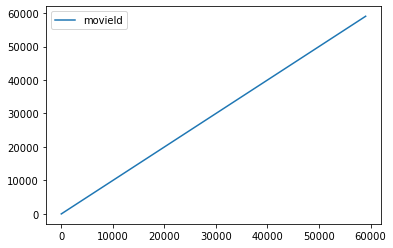

In [20]:
ax = df_movies_embeddings[['movieId']].plot()

In [21]:
df_movies_embeddings['movieId'] = df_movies_embeddings['movieId'].apply(lambda x: movie_inv_mapper[x])

In [22]:
df_movies_embeddings

,movieId,emb_ 0,emb_ 1,emb_ 2,emb_ 3,emb_ 4,emb_ 5,emb_ 6,emb_ 7,emb_ 8,emb_ 9,emb_ 10,emb_ 11,emb_ 12,emb_ 13,emb_ 14,emb_ 15,title
1,2,0.369178,0.699898,2.017702,1.173174,-0.482102,0.903752,-0.546658,-1.290375,-0.192531,-1.400666,-1.347390,0.306060,2.470628,0.081734,-0.266797,-2.005153,Toy Story (1995)
2,3,-0.685875,0.472093,-0.056411,-0.635562,0.017556,-0.790459,0.355003,-1.175706,-0.587460,-0.613796,1.495085,-0.389294,0.981714,-0.050219,-0.525540,0.777718,Jumanji (1995)
3,4,-1.233254,0.079783,0.159002,-0.195276,0.324711,0.578664,-0.317644,0.348256,-0.133221,-1.140872,0.874334,1.225491,1.034311,0.089066,0.147678,0.001328,Grumpier Old Men (1995)
4,5,-0.335979,-0.147337,-0.425568,-0.916668,-0.328779,-0.210148,0.014127,0.319331,-1.373692,-0.511534,-0.122401,0.471811,-0.536177,-0.027751,-0.212748,-0.370292,Waiting to Exhale (1995)
5,6,-1.256414,0.185393,-0.612974,-0.347181,0.144790,-0.023378,0.175292,-0.070726,-0.888017,-1.403624,1.022879,0.684946,0.753179,0.024441,-0.318596,-1.008691,Father of the Bride Part II (1995)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59026,209119,0.164631,-0.069666,-0.041202,-0.264587,0.186190,-0.080572,0.056898,0.676725,0.633656,0.894479,0.305197,0.263008,-0.411014,-0.027768,-0.038236,-0.129005,99 francs (2007)
59031,209133,-0.180810,-0.034885,0.043325,-0.178738,0.076202,0.002882,-0.037786,0.151268,-0.018069,-0.007607,0.009140,-0.007671,-0.016633,0.039056,0.021392,0.027195,Private Property (Nue propriété) (2006)
59037,209145,-0.202537,-0.163428,0.062992,-0.344951,-0.444275,-0.012531,-0.060380,0.090977,0.589728,-0.128691,-0.572871,-0.691092,-0.170124,-0.031665,0.010497,-0.415221,Speed Racer (2008)
59040,209153,-0.226107,-0.014751,0.083239,-0.048404,0.214592,-0.062441,0.016561,0.417758,0.224898,0.543981,-0.113429,-0.091655,-0.218840,-0.028335,0.001977,0.161813,Gabriel (2007)
